<a href="https://colab.research.google.com/github/JessicaWiijaya/COVID_19/blob/main/COVID_19_covid_19_clean_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import pandas
import pandas as pd
# load dataset
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
dataset = '/drive/My Drive/COVID19/covid_19_clean_complete.csv'

In [4]:
df = pd.read_csv(
    dataset)
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.shape

(49068, 10)

In [6]:
df.iloc[0] #memanfaatkan method iloc

Province/State                      NaN
Country/Region              Afghanistan
Lat                            33.93911
Long                          67.709953
Date                         2020-01-22
Confirmed                             0
Deaths                                0
Recovered                             0
Active                                0
WHO Region        Eastern Mediterranean
Name: 0, dtype: object

In [7]:
df.iloc[2, 0]

nan

In [8]:
df.iloc[0, :7]

Province/State            NaN
Country/Region    Afghanistan
Lat                  33.93911
Long                67.709953
Date               2020-01-22
Confirmed                   0
Deaths                      0
Name: 0, dtype: object

In [9]:
df.iloc[1:3, 0]

1    NaN
2    NaN
Name: Province/State, dtype: object

In [10]:
df.iloc[[0, 3, 8], 0]  #Melewatkan list untuk melakukan akses data pada baris dan kolom tertentu dari DataFrame¶

0                             NaN
3                             NaN
8    Australian Capital Territory
Name: Province/State, dtype: object

In [11]:
df.loc[0, 'Active']

0

In [12]:
df.loc[0:5, 'WHO Region']

0    Eastern Mediterranean
1                   Europe
2                   Africa
3                   Europe
4                   Africa
5                 Americas
Name: WHO Region, dtype: object

In [14]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [15]:
df.loc[:, ['Province/State', 'Country/Region', 'Lat', 'Long']].head()

,Province/State,Country/Region,Lat,Long
0,NaN,Afghanistan,33.93911,67.709953
1,NaN,Albania,41.15330,20.168300
2,NaN,Algeria,28.03390,1.659600
3,NaN,Andorra,42.50630,1.521800
4,NaN,Angola,-11.20270,17.873900


In [16]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [17]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [18]:
df['Active'].describe()

count    4.906800e+04
mean     8.085012e+03
std      7.625890e+04
min     -1.400000e+01
25%      0.000000e+00
50%      2.600000e+01
75%      6.060000e+02
max      2.816444e+06
Name: Active, dtype: float64

In [19]:
df['Active'].mean()

8085.01161653216

In [20]:
df['Active'].describe()

count    4.906800e+04
mean     8.085012e+03
std      7.625890e+04
min     -1.400000e+01
25%      0.000000e+00
50%      2.600000e+01
75%      6.060000e+02
max      2.816444e+06
Name: Active, dtype: float64

In [21]:
df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [22]:
df['WHO Region'].value_counts().head()

Europe                   15040
Western Pacific          10340
Africa                    9024
Americas                  8648
Eastern Mediterranean     4136
Name: WHO Region, dtype: int64

In [23]:
Active_mean = df['Active'].mean()
df['Active'].map(lambda p: p - Active_mean)

0       -8085.011617
1       -8085.011617
2       -8085.011617
3       -8085.011617
4       -8085.011617
            ...     
49063   -7968.011617
49064   -7710.011617
49065   -8066.011617
49066   -6938.011617
49067   -7720.011617
Name: Active, Length: 49068, dtype: float64

In [24]:
#Metode Apply
Active_mean = df['Active'].mean()

def remean_points(row):
    row['Active'] = row['Active'] - Active_mean
    return row

df.apply(remean_points, axis='columns').head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,-8085.011617,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,-8085.011617,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,-8085.011617,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,-8085.011617,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,-8085.011617,Africa


In [25]:
Active_mean = df['Active'].mean() #alternatif lain menggunakan built-in operation
df['Active'] - Active_mean

0       -8085.011617
1       -8085.011617
2       -8085.011617
3       -8085.011617
4       -8085.011617
            ...     
49063   -7968.011617
49064   -7710.011617
49065   -8066.011617
49066   -6938.011617
49067   -7720.011617
Name: Active, Length: 49068, dtype: float64

In [26]:
df.loc[(df['Active']/df['Recovered']).idxmax(), 'Deaths']

0

In [27]:
df['Active'].value_counts().head()

0    14151
1     1792
2     1157
3     1027
5      757
Name: Active, dtype: int64

In [28]:
df.groupby('WHO Region')['WHO Region'].count().head()

WHO Region
Africa                    9024
Americas                  8648
Eastern Mediterranean     4136
Europe                   15040
South-East Asia           1880
Name: WHO Region, dtype: int64

In [29]:
df.groupby('WHO Region')['Recovered'].min().head()

WHO Region
Africa                   0
Americas                 0
Eastern Mediterranean    0
Europe                   0
South-East Asia          0
Name: Recovered, dtype: int64

In [30]:
df.groupby('WHO Region').apply(lambda df: df[ df['Active'] == df['Active'].max() ])[['Recovered']].head()

,,Recovered
WHO Region,,
Africa,47178,194865
Americas,49030,1325804
Eastern Mediterranean,42196,104694
Europe,49028,0
South-East Asia,48936,951166


In [31]:
df.groupby('WHO Region')['Active'].agg([len, min, max]).head()

,len,min,max
WHO Region,,,
Africa,9024,-2,173590
Americas,8648,0,2816444
Eastern Mediterranean,4136,0,108642
Europe,15040,-14,254352
South-East Asia,1880,0,495499


In [32]:
#menampilkan nilai deatsh terendah dan tertinggi dari setiap region
df.groupby('WHO Region')['Deaths'].agg(['min', 'max']).head()

,min,max
WHO Region,,
Africa,0,7067
Americas,0,148011
Eastern Mediterranean,0,15912
Europe,0,45759
South-East Asia,0,33408


In [34]:
#membuat dataframe yang lebih sederhana dengan 3 kolom
df = df[['Deaths', 'Recovered', 'Active', 'WHO Region']]
df.head()

,Deaths,Recovered,Active,WHO Region
0,0,0,0,Eastern Mediterranean
1,0,0,0,Europe
2,0,0,0,Africa
3,0,0,0,Europe
4,0,0,0,Africa


In [35]:
#mengubah nama kolom
df.rename(columns={'Confirmed': 'Accepted'}).head()

,Deaths,Recovered,Active,WHO Region
0,0,0,0,Eastern Mediterranean
1,0,0,0,Europe
2,0,0,0,Africa
3,0,0,0,Europe
4,0,0,0,Africa


In [39]:
Region = df.groupby(by='WHO Region').sum()
Region

,Deaths,Recovered,Active
WHO Region,,,
Africa,439978,11193730,10158119
Americas,19359292,157069444,225832458
Eastern Mediterranean,1924029,48050703,24108160
Europe,19271040,123202075,106406678
South-East Asia,1458134,30030327,23629904
Western Pacific,932430,18861950,6580031


In [40]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

# output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline

<ipython-input-41-aec1994f8f9b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data= df.corr())


<Axes: >

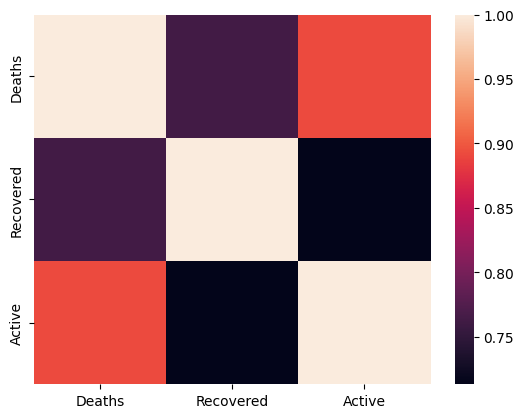

In [41]:
sns.heatmap(data= df.corr())

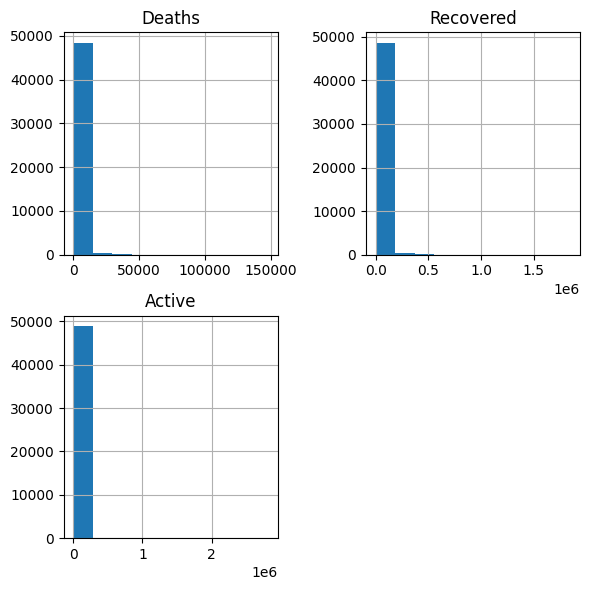

In [42]:
df.hist(figsize=(6,6), bins=10) #hist = histogram, bins=lebar datanya
plt.tight_layout()

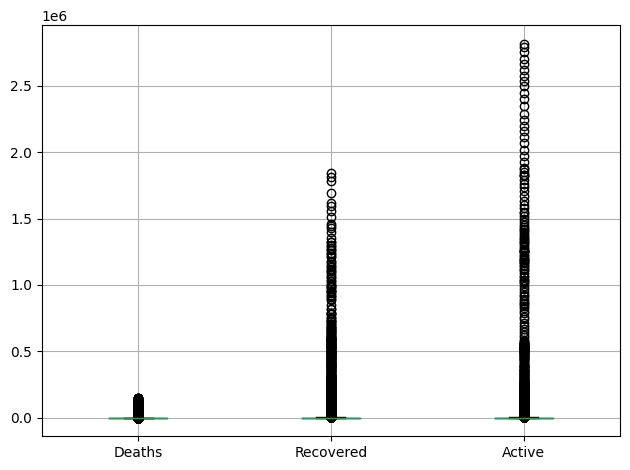

In [43]:
df.boxplot()
plt.tight_layout()

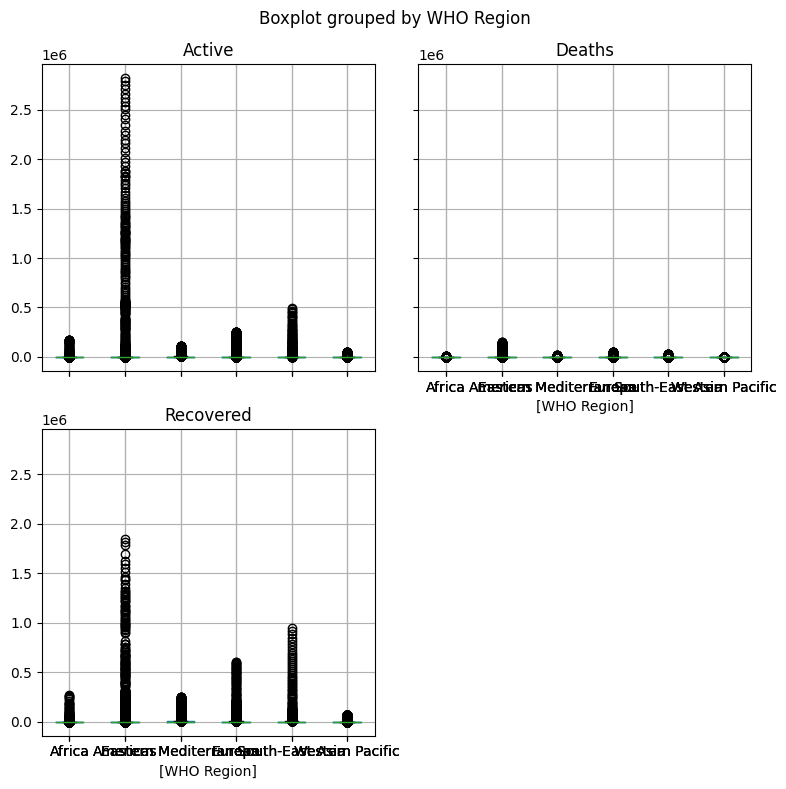

In [44]:
df.boxplot(by="WHO Region", figsize=(8,8))
plt.tight_layout()

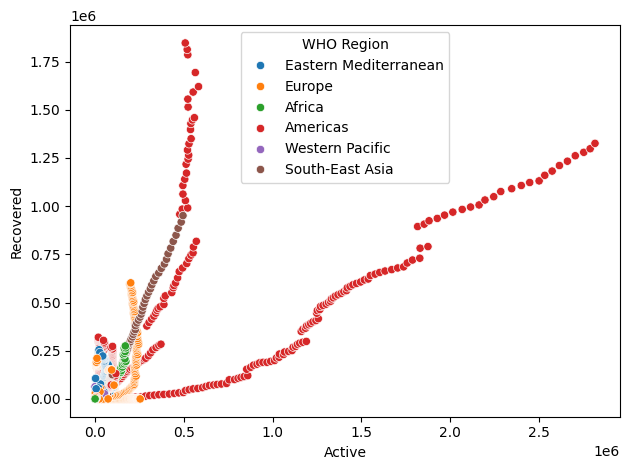

In [46]:
sns.scatterplot(x='Active', y='Recovered', data= df, hue='WHO Region')
plt.tight_layout()

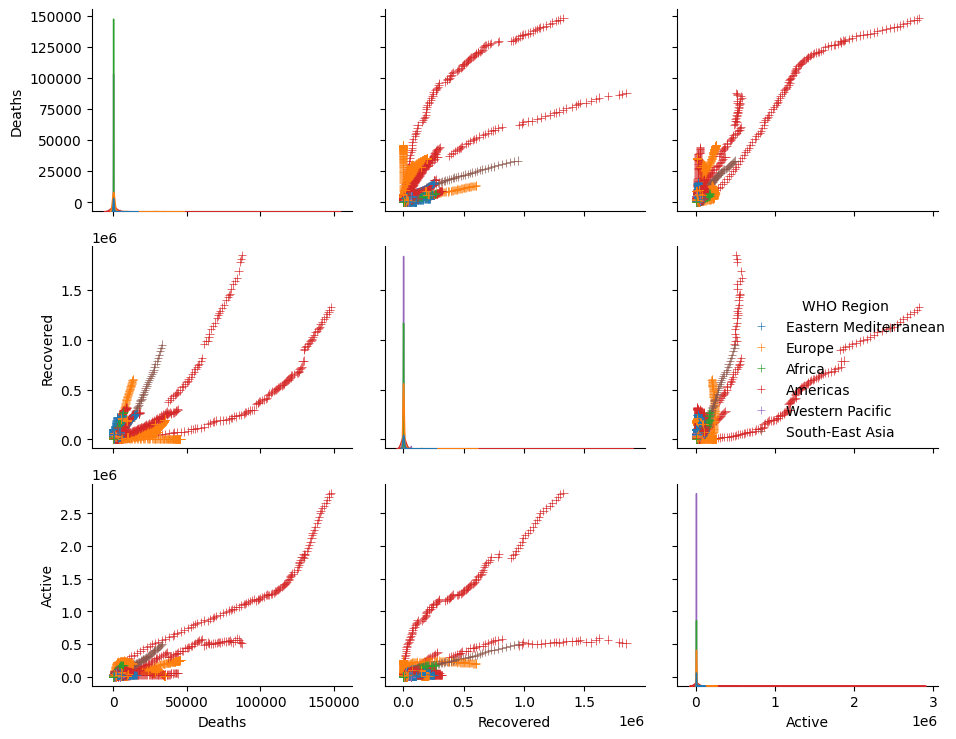

In [47]:
sns.pairplot( df, hue='WHO Region', markers='+')
plt.tight_layout()